In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data into a df and display first 5 rows
data = pd.read_csv("MSFT.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-08,254.039993,254.539993,250.809998,253.699997,251.634766,17340200
1,2023-03-09,255.820007,259.559998,251.580002,252.320007,250.266006,26653400
2,2023-03-10,251.080002,252.789993,247.600006,248.589996,246.566360,28333900
3,2023-03-13,247.399994,257.910004,245.729996,253.919998,251.852951,33339700
4,2023-03-14,256.750000,261.070007,255.860001,260.790009,258.667084,33620300


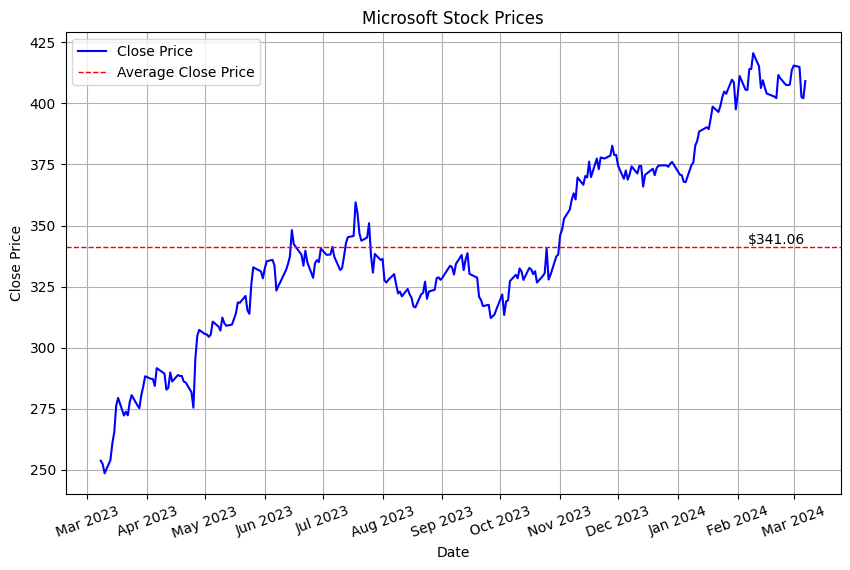

In [3]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='b', label='Close Price')

# Format x ticks to display months
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b %Y')

plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)

plt.title('Microsoft Stock Prices')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(rotation=20)

# Add a horizontal line at the average close price
average_close_price = data['Close'].mean()
plt.axhline(y=average_close_price, color='r', linestyle='--', linewidth=1, label='Average Close Price')

# Annotate the average close price
plt.text(data['Date'].iloc[-1], average_close_price, f'${average_close_price:.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.legend()
plt.show()

In [4]:
corr_matrix = data.corr()
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997689,0.997927,0.994787,0.994848,-0.143212
High,0.997689,1.000000,0.997705,0.997638,0.997595,-0.122490
Low,0.997927,0.997705,1.000000,0.998157,0.998162,-0.161540
Close,0.994787,0.997638,0.998157,1.000000,0.999950,-0.145086
Adj Close,0.994848,0.997595,0.998162,0.999950,1.000000,-0.147057
Volume,-0.143212,-0.122490,-0.161540,-0.145086,-0.147057,1.000000


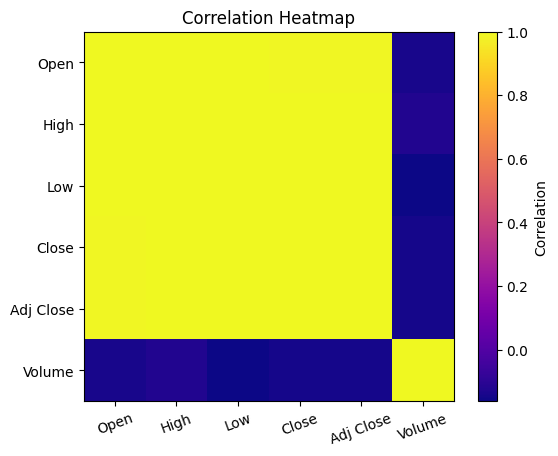

In [5]:
# Correlation Heatmap
plt.imshow(corr_matrix, cmap='plasma')
plt.colorbar(label='Correlation')
plt.title('Correlation Heatmap')
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=20)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)
plt.show()

In [6]:
# Build the ML model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X = data[["Open", "High", "Low"]]
y = data["Close"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

# Create a DataFrame with the predicted rates and dependent variables
data = pd.DataFrame({"Open": xtest["Open"],
                     "High": xtest["High"],
                     "Low": xtest["Low"],
                     "Prediction": ypred})

data.head()

,Open,High,Low,Prediction
165,339.790009,347.420013,339.649994,348.100006
6,265.209991,276.559998,263.279999,265.440002
111,320.799988,324.420013,319.799988,321.859985
172,361.489990,370.100006,361.070007,363.200012
115,325.500000,326.079987,321.459991,323.700012


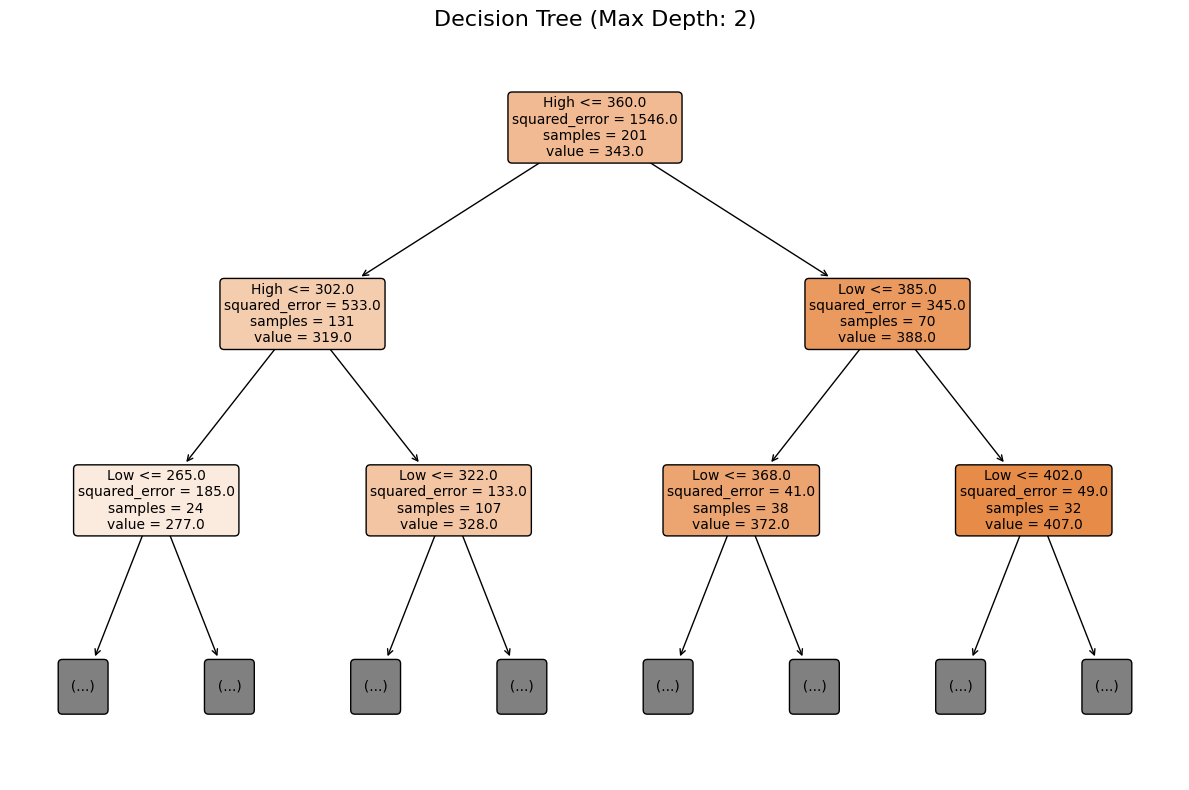

In [7]:
# Plot decision tree with limited depth
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True,
          rounded=True, fontsize=10, max_depth=2, precision=0)
plt.title('Decision Tree (Max Depth: 2)', fontsize=16)
plt.tight_layout()
plt.show()

